<a href="https://colab.research.google.com/github/andreregino/network-science-notebooks/blob/main/Network_With_Big_Connected_Component.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a program for the following task. Starting from a graph with
1000 nodes and no links, add links randomly, one at a time, until your
graph has a connected component that comprises at least 501 nodes.
What is the value of hki at this point? Repeat the experiment 50 times,
and plot the distributiion of hki values.
Hand in your code together with the solutions.

This is not a random network, even though it has random edges

In [1]:
# importing the used libs
import networkx as netx
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
# calculating the average degree
def calculate_average_k(G):
  number_of_nodes = 1000 # fixed number of degrees of the graph
  degree_of_network = G.degree()
  degrees = dict(degree_of_network).values()
  average_degree = sum(degrees) / number_of_nodes
  return average_degree

In [3]:
average_degrees = []

for i in range(50):
  exit_loop = False # control variable to exit loop when number of nodes > 500
  random_edges = []
  graph = netx.empty_graph(n=1000) # create empty graph with 1000 nodes
  while exit_loop == False:
    random_edges = np.random.choice(graph.nodes, 2) # choose 2 random nodes in the nodes' list
    graph.add_edge(random_edges[0], random_edges[1]) #create a link between these 2 random nodes
    sorted_connected_components = sorted(netx.connected_components(graph), key=len, reverse=True) # sort the connected components by their lengths
    number_of_nodes = len(sorted_connected_components[0])
    if number_of_nodes > 500:
      exit_loop = True;
      average_degrees.append(calculate_average_k(graph)) # list to store all K values

List of K values [1.314, 1.32, 1.328, 1.334, 1.348, 1.35, 1.35, 1.352, 1.358, 1.36, 1.36, 1.364, 1.364, 1.364, 1.366, 1.368, 1.37, 1.372, 1.378, 1.378, 1.38, 1.382, 1.382, 1.386, 1.388, 1.394, 1.394, 1.394, 1.396, 1.4, 1.402, 1.404, 1.406, 1.408, 1.41, 1.412, 1.414, 1.418, 1.42, 1.42, 1.42, 1.424, 1.428, 1.432, 1.436, 1.442, 1.442, 1.442, 1.474, 1.488]


<BarContainer object of 10 artists>

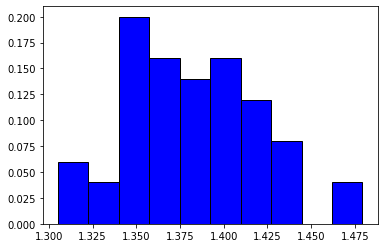

In [4]:
# plotting the degree distribution, with y axis ranging from 0 to 1
average_degrees = sorted(average_degrees)
print("List of K values", average_degrees) 
results, edges = np.histogram(average_degrees, density=True)

width = edges[1] - edges[0]
bins = np.arange(min(average_degrees),max(average_degrees), width)
plt.bar(edges[:-1], results * width, width, color='blue', edgecolor='black')